<h1> LSTM과 CNN의 조합을 이용한 영화 리뷰 분류하기 </h1>

In [2]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from keras.preprocessing import sequence
from keras.utils import np_utils

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

# 테스트셋 20%
(x_train,y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

# 데이터 전처리
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

model = Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total para

Conv1D, MaxPooling1D은 2차원을 1차원으로 바꿔준 것 ! 컨볼루션 층도 1차원이고 이동하는 배열도 1차원

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 29s 1ms/step - loss: 0.4637 - acc: 0.7616 - val_loss: 0.3430 - val_acc: 0.8491
Epoch 2/5
25000/25000 [==============================] - 29s 1ms/step - loss: 0.2950 - acc: 0.8758 - val_loss: 0.3234 - val_acc: 0.8576
Epoch 3/5
25000/25000 [==============================] - 29s 1ms/step - loss: 0.2496 - acc: 0.8992 - val_loss: 0.3274 - val_acc: 0.8578
Epoch 4/5
25000/25000 [==============================] - 30s 1ms/step - loss: 0.2174 - acc: 0.9130 - val_loss: 0.3347 - val_acc: 0.8550
Epoch 5/5
25000/25000 [==============================] - 9s 342us/step

 Test Accuracy: 0.8521


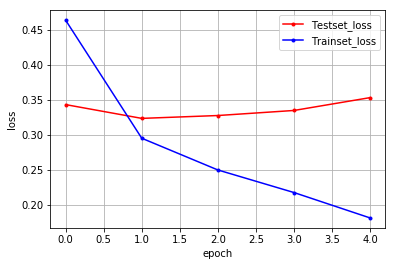

In [3]:
model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=5, batch_size=100)

print("\n Test Accuracy: %.4f" % (model.evaluate(x_test,y_test)[1]))

# 테스트셋의 오차
y_vloss = history.history['val_loss']
# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', c="blue", label="Trainset_loss")
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()